In [1]:
# Import necessary libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Set up Splinter
browser = Browser()
# Set up base url
base_url = "https://www.facebook.com/marketplace/toronto/search?"
# Set up search parameters
min_price = 1000
max_price = 30000
days_listed = 7
min_mileage = 50000
max_mileage = 200000
min_year = 2000
max_year = 2020
transmission = "automatic"
make = "Honda"
model = "Civic"
#Set up full url
url = f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&maxMileage={max_mileage}&maxYear={max_year}&minMileage={min_mileage}&minYear={min_year}&transmissionType={transmission}&query={make}{model}&exact=false"

In [3]:
# Visit the website
browser.visit(url)

In [4]:
if browser.is_element_present_by_css('div[aria-label="Close"]', wait_time=10):
    # Click on the element once it's found
    browser.find_by_css('div[aria-label="Close"]').first.click()

In [5]:
# Scroll down to load more results

# Define the number of times to scroll the page
scroll_count = 4

# Define the delay (in seconds) between each scroll
scroll_delay = 2

# Loop to perform scrolling
for _ in range(scroll_count):
    # Execute JavaScript to scroll to the bottom of the page
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Pause for a moment to allow the content to load
    time.sleep(scroll_delay)

In [6]:
# Parse the HTML
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
market_soup = soup(html, 'html.parser')
# Check if HTML was scraped correctly
market_soup

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="en"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/UJj0tgk-RrT.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" href="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" rel="shortcut icon"/><meta content="noarchive" name="bingbot"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 

In [7]:
# End the automated browsing session
browser.quit()

In [8]:
# Extract all the necessary info and insert into lists
titles_div = market_soup.find_all('span', class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
titles_list = [title.text.strip() for title in titles_div]
prices_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u")
prices_list = [price.text.strip() for price in prices_div]
mileage_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x3x7a5m x1nxh6w3 x1sibtaa xo1l8bm xi81zsa")
mileage_list = [mileage.text.strip() for mileage in mileage_div]
urls_div = market_soup.find_all('a', class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1sur9pj xkrqix3 x1lku1pv")
urls_list = [url.get('href') for url in urls_div]

In [9]:
# Create a regular expression pattern to match city and state entries like "City, State"
pattern = re.compile(r'(\w+(?:-\w+)?, [A-Z]{2})')

# Initialize an empty list to store adjusted mileage entries
mileage_list2 = []

# Iterate through the original mileage entries
for item in mileage_list:
    # Append the current mileage entry to the adjusted list
    mileage_list2.append(item)
    
    # Check if the current mileage entry matches the pattern and there are at least two entries in the adjusted list
    if pattern.match(item) and len(mileage_list2) >= 2 and pattern.match(mileage_list2[-2]):
        # If the conditions are met, insert "0K km" in between the two consecutive city and state entries
        mileage_list2.insert(-1, '0K km')

In [10]:
mileage_list2

['Toronto, ON',
 '168K km',
 'Toronto, ON',
 '172K km',
 'Toronto, ON',
 '100K km',
 'Toronto, ON',
 '197K km',
 'Toronto, ON',
 '162K km',
 'Toronto, ON',
 '103K km',
 'Mississauga, ON',
 '103K km',
 'Lincoln, ON',
 '159K km',
 'Toronto, ON',
 '125K km',
 'Toronto, ON',
 '159K km',
 'Toronto, ON',
 '200K km',
 'Toronto, ON',
 '90K km',
 'Toronto, ON',
 '198K km',
 'Toronto, ON',
 '170K km',
 'Toronto, ON',
 '103K km',
 'Toronto, ON',
 '160K km',
 'Brampton, ON',
 '99K km',
 'Owen Sound, ON',
 '115K km',
 'Brampton, ON',
 '157K km',
 'Toronto, ON',
 '195K km',
 'Toronto, ON',
 '148K km',
 'Mississauga, ON',
 '168K km',
 'Mississauga, ON',
 '180K km',
 'Toronto, ON',
 '92K km',
 'Toronto, ON',
 '77K km',
 'Toronto, ON',
 '143K km',
 'Toronto, ON',
 '183K km',
 'Toronto, ON',
 '126K km',
 'Hamilton, ON',
 '139K km',
 'Toronto, ON',
 '196K km',
 'Toronto, ON',
 '85K km',
 'Toronto, ON',
 '190K km',
 'Toronto, ON',
 '135K km',
 'Toronto, ON',
 '189K km',
 'Richmond Hill, ON',
 '123K km',
 

In [11]:
# Extracted mileage list (separate from location and extract numeric values only)
# Define regular expressions to extract numeric mileage values in "K km" and "K miles" format
mileage_pattern_km = r'(\d+)K km'
mileage_pattern_miles = r'(\d+)K miles'

# Initialize an empty list to store cleaned mileage values
mileage_clean = []

# Iterate through the adjusted mileage entries
for item in mileage_list2:
    # Try to find a match for the "K km" format
    match_mileage_km = re.search(mileage_pattern_km, item)
    
    # Try to find a match for the "K miles" format
    match_mileage_miles = re.search(mileage_pattern_miles, item)
    
    # Check if either of the formats is found
    if match_mileage_km or match_mileage_miles:
        # If "K km" format is found, convert it to meters and append to the cleaned list
        if match_mileage_km:
            mileage_clean.append(int(match_mileage_km.group(1)) * 1000)
        # If "K miles" format is found, convert it to meters and append to the cleaned list
        else:
            mileage_clean.append(int(match_mileage_miles.group(1)) * 1600)

In [12]:
mileage_clean

[168000,
 172000,
 100000,
 197000,
 162000,
 103000,
 103000,
 159000,
 125000,
 159000,
 200000,
 90000,
 198000,
 170000,
 103000,
 160000,
 99000,
 115000,
 157000,
 195000,
 148000,
 168000,
 180000,
 92000,
 77000,
 143000,
 183000,
 126000,
 139000,
 196000,
 85000,
 190000,
 135000,
 189000,
 123000,
 178000,
 85000,
 194000,
 145000,
 193000,
 75000,
 185000,
 114000,
 143000,
 144000,
 195000,
 91000,
 150000,
 174000,
 159000,
 129000,
 193000,
 165000,
 158000,
 186000,
 193000,
 144000,
 193000,
 100000,
 131000,
 131000,
 145000,
 130000,
 137000,
 167000,
 67000,
 174000,
 59000,
 182000,
 171000,
 152000,
 138000,
 197000,
 52000,
 193000,
 162000,
 193000,
 140000,
 188000,
 55000,
 160000,
 157000,
 146000,
 66000,
 110000,
 131000,
 158000,
 127000,
 119000,
 180000,
 110000,
 127000,
 119000,
 63000,
 114000,
 186000,
 171000,
 161000,
 194000,
 95000,
 190000,
 51000,
 76000,
 162000,
 103000,
 186000,
 103000,
 199000,
 283200,
 151000,
 136000,
 147000,
 136000,


In [13]:
# Add all values to a list of dictionaries
vehicles_list = []

for i, item in enumerate(titles_list):
    cars_dict = {}
    
    title_split = titles_list[i].split()
    
    cars_dict["Year"] = int(title_split[0])
    cars_dict["Make"] = title_split[1]
    cars_dict["Model"] = title_split[2]
    cars_dict["Price"] = int(re.sub(r'[^\d.]', '', prices_list[i]))
    cars_dict["Mileage"] = mileage_clean[i]
    cars_dict["URL"] = urls_list[i]
    vehicles_list.append(cars_dict)
    
print(vehicles_list)

[{'Year': 2013, 'Make': 'Honda', 'Model': 'civic', 'Price': 10500, 'Mileage': 168000, 'URL': '/marketplace/item/429295940012165/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2017, 'Make': 'Honda', 'Model': 'civic', 'Price': 12999, 'Mileage': 172000, 'URL': '/marketplace/item/3322950804673098/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2018, 'Make': 'Honda', 'Model': 'civic', 'Price': 3000, 'Mileage': 100000, 'URL': '/marketplace/item/1120029199067752/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2008, 'Make': 'Honda', 'Model': 'civic', 'Price': 3900, 'Mileage': 197000, 'URL': '/marketplace/item/1172630160856439/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2007, 'Make': 'Honda', 'Model': 'civic', 'Price': 3900, 'Mileage': 162000, 'URL': '/marketplace/item/3828906090671002/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Y

In [14]:
vehicles_df = pd.DataFrame(vehicles_list)

# Set the display option to ensure that all characters in a column are shown
pd.set_option('display.max_colwidth', None)

vehicles_df.tail()

,Year,Make,Model,Price,Mileage,URL
109,2019,Honda,civic,18999,151000,/marketplace/item/1678994299303947/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
110,2017,Honda,accord,18000,136000,/marketplace/item/412750681762299/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
111,2007,Honda,civic,6950,147000,/marketplace/item/986321832843035/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
112,2008,Honda,accord,8300,136000,/marketplace/item/4043114315915967/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
113,2018,Honda,civic,19777,87000,/marketplace/item/1227529701551898/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


In [15]:
# Add the prefix to the URLs
vehicles_df['URL'] = 'https://www.facebook.com/' + vehicles_df['URL']

In [16]:
vehicles_df.sample(10)

,Year,Make,Model,Price,Mileage,URL
15,2015,Honda,civic,11500,160000,https://www.facebook.com//marketplace/item/852418736928705/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
99,2015,Honda,civic,12000,95000,https://www.facebook.com//marketplace/item/918115760089371/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
2,2018,Honda,civic,3000,100000,https://www.facebook.com//marketplace/item/1120029199067752/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
88,2019,Honda,civic,14990,119000,https://www.facebook.com//marketplace/item/1162253861869291/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
77,2015,Honda,civic,16000,140000,https://www.facebook.com//marketplace/item/761579122821664/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
10,2020,Honda,civic,13500,200000,https://www.facebook.com//marketplace/item/1108945783520268/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
3,2008,Honda,civic,3900,197000,https://www.facebook.com//marketplace/item/1172630160856439/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
44,2017,Honda,civic,13950,144000,https://www.facebook.com//marketplace/item/746323210906810/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
87,2018,Honda,civic,17950,127000,https://www.facebook.com//marketplace/item/978343034010643/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
104,2020,Honda,civic,14999,103000,https://www.facebook.com//marketplace/item/1676544306431745/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


In [17]:
# Filter the DataFrame to include rows where the 'Model' column matches the specified model, regardless of case.
filtered_df = vehicles_df[vehicles_df['Model'].str.lower() == model.lower()]

In [18]:
filtered_df

,Year,Make,Model,Price,Mileage,URL
0,2013,Honda,civic,10500,168000,https://www.facebook.com//marketplace/item/429295940012165/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
1,2017,Honda,civic,12999,172000,https://www.facebook.com//marketplace/item/3322950804673098/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
2,2018,Honda,civic,3000,100000,https://www.facebook.com//marketplace/item/1120029199067752/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
3,2008,Honda,civic,3900,197000,https://www.facebook.com//marketplace/item/1172630160856439/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
4,2007,Honda,civic,3900,162000,https://www.facebook.com//marketplace/item/3828906090671002/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
...,...,...,...,...,...,...
107,2018,Honda,civic,16800,199000,https://www.facebook.com//marketplace/item/1528265201373351/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
108,2002,Honda,civic,1000,283200,https://www.facebook.com//marketplace/item/825307585694896/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
109,2019,Honda,civic,18999,151000,https://www.facebook.com//marketplace/item/1678994299303947/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
111,2007,Honda,civic,6950,147000,https://www.facebook.com//marketplace/item/986321832843035/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


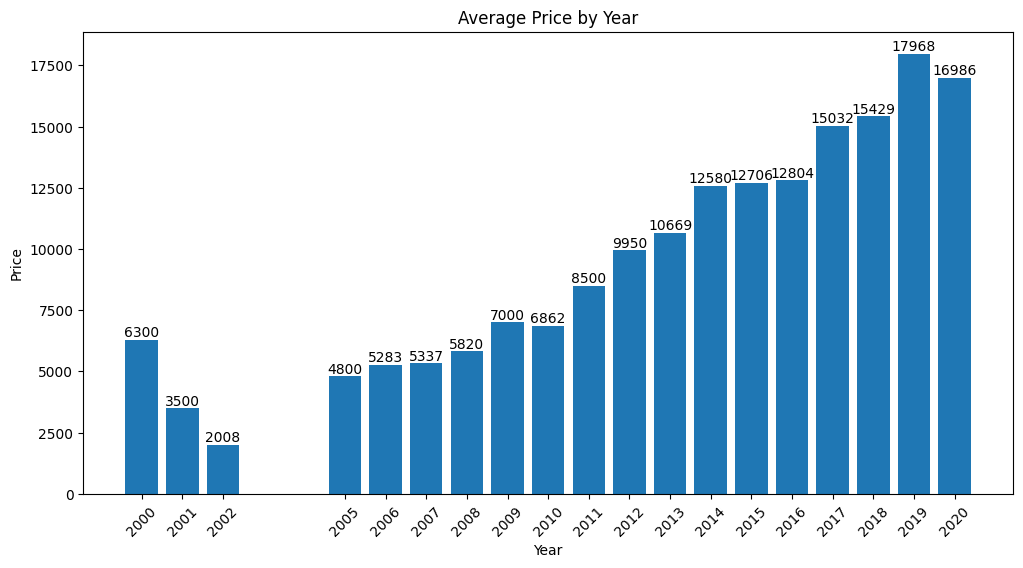

In [19]:
# Group the data by "Year" and calculate the mean price for each year
yearly_prices = vehicles_df.groupby("Year")["Price"].mean()

# Create a wider figure
plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(yearly_prices.index, yearly_prices.values)

# Add values on top of the bars with no digits after the period
for x, y in zip(yearly_prices.index, yearly_prices.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Price by Year")

# Use adaptive scale for the year axis
plt.xticks(yearly_prices.index, rotation=45)

# Show the chart
plt.show()

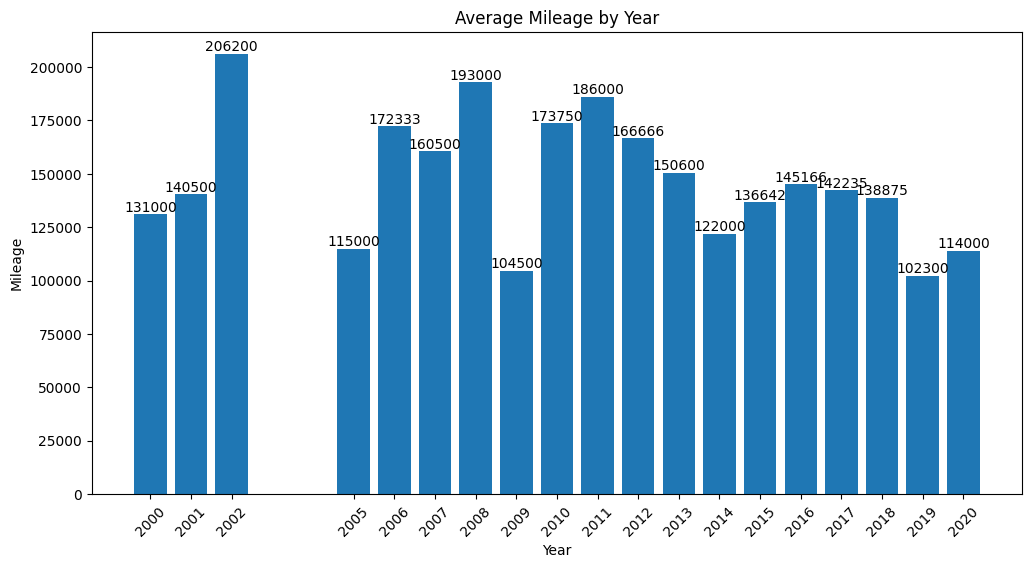

In [20]:
# Filter out rows where mileage is zero
filtered_df = filtered_df[filtered_df["Mileage"] != 0]

# Group the data by "Year" and calculate the mean mileage for each year
yearly_miles = filtered_df.groupby("Year")["Mileage"].mean()

# Create a wider figure
plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(yearly_miles.index, yearly_miles.values)

# Add values on top of the bars
for x, y in zip(yearly_miles.index, yearly_miles.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title("Average Mileage by Year")

# Use adaptive scale for the year axis
plt.xticks(yearly_miles.index, rotation=45)

# Show the chart
plt.show()

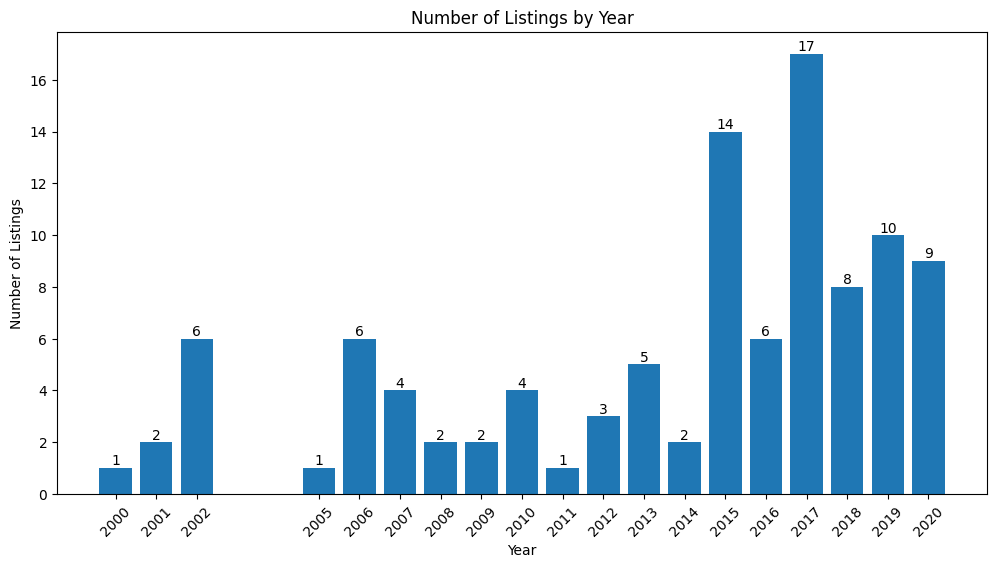

In [21]:
# Group the data by "Year" and count the number of listings for each year
listings_by_year = filtered_df.groupby("Year").size()

# Create a wider figure
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(listings_by_year.index, listings_by_year.values)

# Add values on top of the bars
for x, y in zip(listings_by_year.index, listings_by_year.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Year")

# Use adaptive scale for the year axis
plt.xticks(listings_by_year.index, rotation=45)

# Show the chart
plt.show()

In [22]:
# Find the URL of the cheapest Honda Civic directly from the filtered DataFrame
cheapest_civic_url = filtered_df[filtered_df["Price"] == filtered_df["Price"].min()]["URL"].values[0]

# Print the URL
print(f"{cheapest_civic_url}")

https://www.facebook.com//marketplace/item/825307585694896/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


In [23]:
# Export to CSV

csv_file_path = r'C:\Users\shake\Desktop\Projects\Flip-Finder\cars.csv'

filtered_df.to_csv(csv_file_path, index=False)